In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,Adam
from keras import callbacks
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from keras.models import model_from_json
import smtplib, ssl
from exif import Image as im
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.message import EmailMessage

In [11]:
def decimal_coords(coords, ref):
 decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600
 if ref == "S" or ref == "W":
     decimal_degrees = -decimal_degrees
 return decimal_degrees

def link(lat,lon):
    l = 'https://maps.google.com/?q='+str(lat)+','+str(lon)
    return l
    

def mail(dir_path):
    port = 587
    smtp_server = "smtp.gmail.com"
    sender_email = "abhijeetdk2000@gmail.com"
    receiver_email = "amrutaasuryawanshi2001@gmail.com"
    password = "pfuzmwmdcsnvumsy"
    ima = im(dir_path)
    
    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        msg = EmailMessage()
        Link = link(decimal_coords(ima.gps_latitude,ima.gps_latitude_ref),decimal_coords(ima.gps_longitude,ima.gps_longitude_ref))
        M = """\
Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
""" + "Image Latitude:\n" + str(decimal_coords(ima.gps_latitude,ima.gps_latitude_ref)) + "\nImage Longitude:\n" + str(decimal_coords(ima.gps_longitude,ima.gps_longitude_ref)) + '\nImage time: \n' + str(ima.datetime_original) + '\nGoogle Map Link: \n' + Link

        msg.set_content(M)
        msg['Subject'] = 'Waste Location'
        msg['From'] = "abhijeetdk2000@gmail.com"
        msg['To'] = "amrutaasuryawanshi2001@gmail.com"
        print(msg)
        # Send the message via our own SMTP server.
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.login("abhijeetdk2000@gmail.com", password)
        server.send_message(msg)
        server.quit()
        

In [3]:
json_file = open('model20_86.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn20_86.h5")
print("Loaded model")


Loaded model


In [4]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

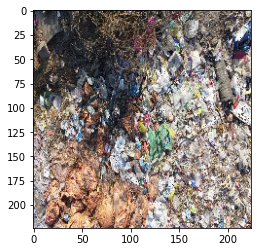

The given image is waste
10\DJI_0629.jpg
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0
Subject: Waste Location
From: abhijeetdk2000@gmail.com
To: amrutaasuryawanshi2001@gmail.com

Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
Image Latitude:
17.05792813888889
Image Longitude:
74.2633063611111
Image time: 
2021:05:14 13:40:47
Google Map Link: 
https://maps.google.com/?q=17.05792813888889,74.2633063611111



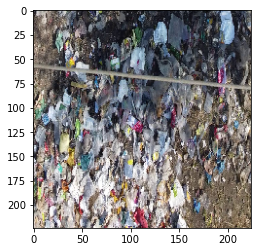

The given image is waste
10\DJI_0630.jpg
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0
Subject: Waste Location
From: abhijeetdk2000@gmail.com
To: amrutaasuryawanshi2001@gmail.com

Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
Image Latitude:
17.057897444444446
Image Longitude:
74.26321802777778
Image time: 
2021:05:14 13:40:50
Google Map Link: 
https://maps.google.com/?q=17.057897444444446,74.26321802777778



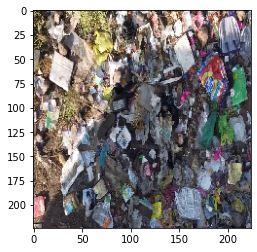

The given image is waste
10\DJI_0631.jpg
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0
Subject: Waste Location
From: abhijeetdk2000@gmail.com
To: amrutaasuryawanshi2001@gmail.com

Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
Image Latitude:
17.05786691666667
Image Longitude:
74.26312988888888
Image time: 
2021:05:14 13:40:52
Google Map Link: 
https://maps.google.com/?q=17.05786691666667,74.26312988888888



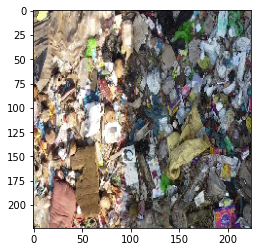

The given image is waste
10\DJI_0632.jpg
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0
Subject: Waste Location
From: abhijeetdk2000@gmail.com
To: amrutaasuryawanshi2001@gmail.com

Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
Image Latitude:
17.057835305555557
Image Longitude:
74.26304175
Image time: 
2021:05:14 13:40:55
Google Map Link: 
https://maps.google.com/?q=17.057835305555557,74.26304175



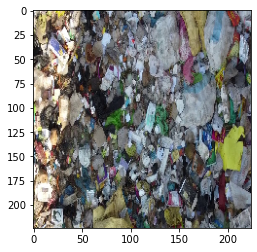

The given image is waste
10\DJI_0633.jpg
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0
Subject: Waste Location
From: abhijeetdk2000@gmail.com
To: amrutaasuryawanshi2001@gmail.com

Hi,
Image given to the model has detected waste in it.
The details of the image and the location is specified as below:
Image Latitude:
17.057804333333333
Image Longitude:
74.26295402777778
Image time: 
2021:05:14 13:40:57
Google Map Link: 
https://maps.google.com/?q=17.057804333333333,74.26295402777778



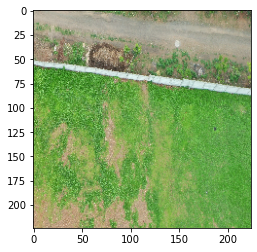

The given image is clean


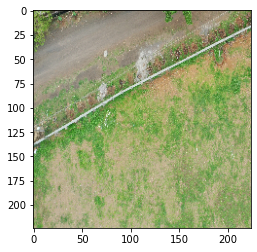

The given image is clean


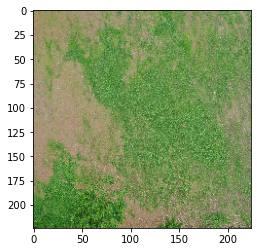

The given image is clean


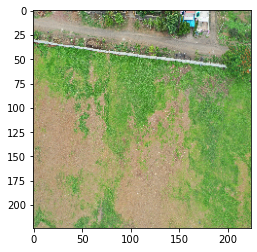

The given image is clean


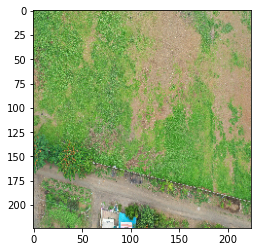

The given image is clean


In [12]:
dir_path = '10'
for i in os.listdir(dir_path):
  dir_path = '10' + "\\" + i
  img = image.load_img(dir_path,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = loaded_model.predict(images)
  if val == 0:
    print("The given image is clean")
  else:
    print("The given image is waste")
    print(dir_path)
    mail(dir_path)